🔹 First 10 rows of the dataset:
   Feature1   Feature2  TrueCluster
0 -2.551873   0.361363            2
1 -7.011841  10.946317            0
2 -1.406418  -1.432898            2
3  3.604396  -2.962186            1
4 -5.222925   9.282866            0
5 -5.452360   8.929250            0
6 -4.798159   8.374742            0
7 -0.895018  -2.089264            2
8 -4.939402   8.425513            0
9  3.212104  -1.463565            1


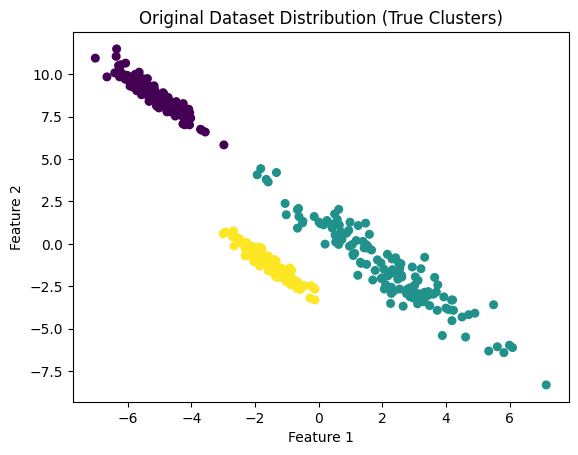

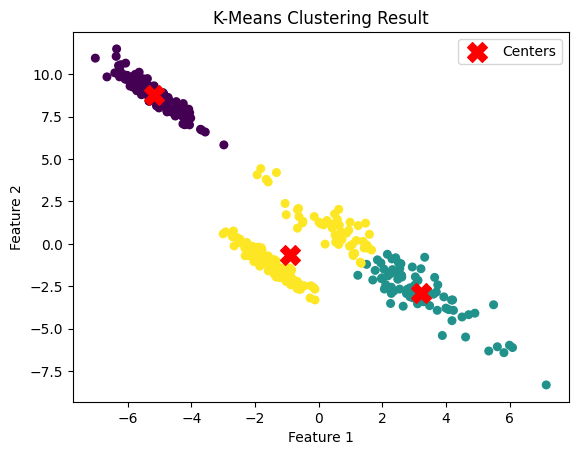

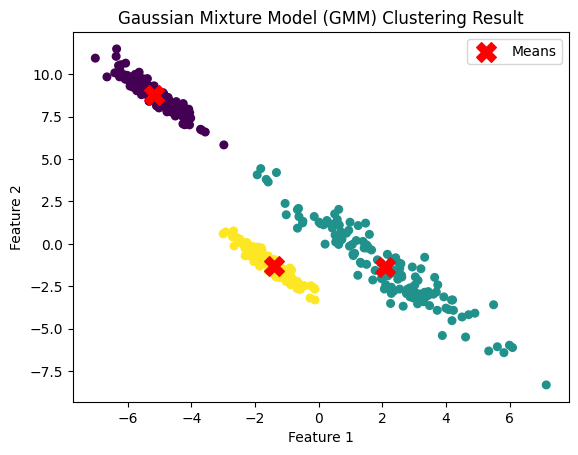


🔹 Comparison Results:
K-Means ARI Score: 0.6933413347753811
GMM ARI Score: 1.0

Confusion Matrix - K-Means:
 [[134   0   0]
 [  0  81  52]
 [  0   0 133]]

Confusion Matrix - GMM:
 [[134   0   0]
 [  0 133   0]
 [  0   0 133]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# 1. Generate dataset (elliptical, overlapping clusters)
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=[1.0, 2.5, 0.8], random_state=42)

# Apply transformation to make clusters elliptical
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Convert to DataFrame for printing
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["TrueCluster"] = y_true

print("🔹 First 10 rows of the dataset:")
print(df.head(10))

# 2. Show distribution (ground truth clusters)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap="viridis", s=30)
plt.title("Original Dataset Distribution (True Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centers")
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 4. GMM clustering
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap="viridis", s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
            c="red", marker="X", s=200, label="Means")
plt.title("Gaussian Mixture Model (GMM) Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 5. Compare using Adjusted Rand Index & Confusion Matrices
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_gmm = adjusted_rand_score(y_true, labels_gmm)

print("\n🔹 Comparison Results:")
print("K-Means ARI Score:", ari_kmeans)
print("GMM ARI Score:", ari_gmm)

print("\nConfusion Matrix - K-Means:\n", confusion_matrix(y_true, labels_kmeans))
print("\nConfusion Matrix - GMM:\n", confusion_matrix(y_true, labels_gmm))

First 10 rows


,Residue_Number,Residue_Name,Window,Hydropathy_Cutoff,Minimum_Blob_Length,blob_length,Normalized_Mean_Blob_Hydropathy,Min_Blob_Hydropathy,Blob_Type,Blob_Index_Number,Blob_Das-Pappu_Class,Blob_NCPR,Fraction_of_Positively_Charged_Residues,Fraction_of_Negatively_Charged_Residues,Fraction_of_Charged_Residues,Uversky_Diagram_Score,dSNP_enrichment,Blob_Disorder,Normalized_Kyte-Doolittle_hydropathy,Kyte-Doolittle_hydropathy
0,1,M,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.711111,1.9
1,2,E,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.111111,-3.5
2,3,P,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.322222,-1.6
3,4,A,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.700000,1.8
4,5,A,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.700000,1.8
5,6,G,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.455556,-0.4
6,7,S,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.411111,-0.8
7,8,S,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.411111,-0.8
8,9,M,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.711111,1.9
9,10,E,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.111111,-3.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Residue_Number                           156 non-null    int64  
 1   Residue_Name                             156 non-null    object 
 2   Window                                   156 non-null    int64  
 3   Hydropathy_Cutoff                        156 non-null    float64
 4   Minimum_Blob_Length                      156 non-null    int64  
 5   blob_length                              156 non-null    int64  
 6   Normalized_Mean_Blob_Hydropathy          156 non-null    float64
 7   Min_Blob_Hydropathy                      156 non-null    float64
 8   Blob_Type                                156 non-null    object 
 9   Blob_Index_Number                        156 non-null    object 
 10  Blob_Das-Pappu_Class                     156 non-n

None

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_2428\213287917.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],


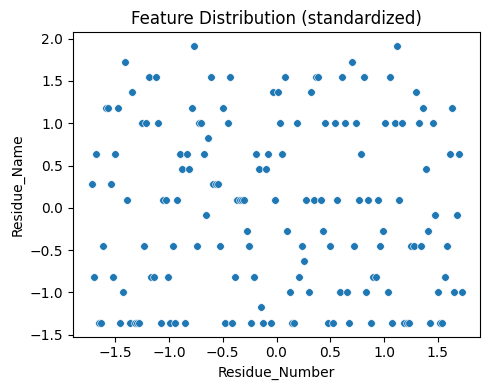

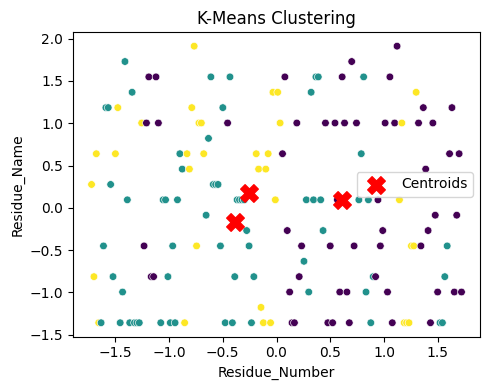

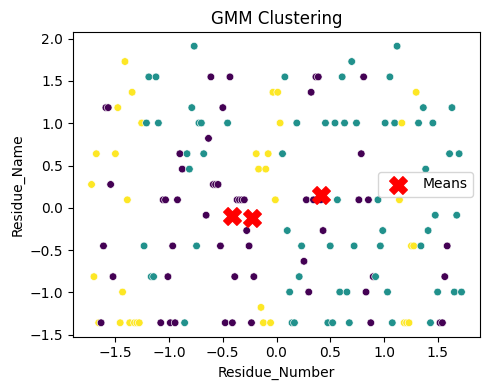


Feature importance (between-cluster variance ratio):
                                     Feature  KMeans_BetweenVarRatio  \
3                         Hydropathy_Cutoff                0.000000   
2                                    Window                0.000000   
4                       Minimum_Blob_Length                0.000000   
17                            Blob_Disorder                0.000000   
1                              Residue_Name                0.022038   
19                Kyte-Doolittle_hydropathy                0.104431   
18     Normalized_Kyte-Doolittle_hydropathy                0.104431   
5                               blob_length                0.165589   
0                            Residue_Number                0.208553   
11                                Blob_NCPR                0.245955   
7                       Min_Blob_Hydropathy                0.342869   
13  Fraction_of_Negatively_Charged_Residues                0.374998   
12  Fraction_of_Positi

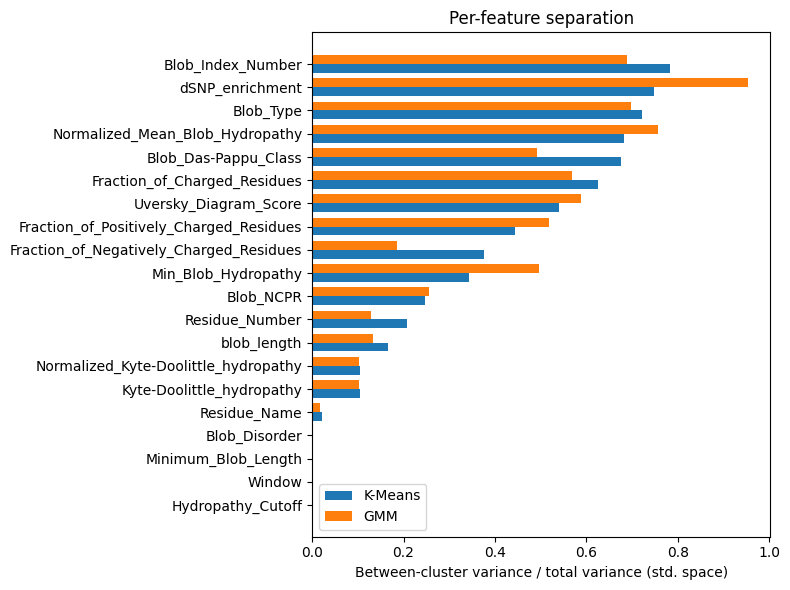

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.optimize import linear_sum_assignment  # for best label mapping

# ---------- Load
df = pd.read_csv("blob.csv")
print("First 10 rows")
display(df.head(10))
display(df.info())

# ---------- Encode object columns (if any)
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---------- Split features / true labels (if provided)
y_true = df["TrueCluster"].values if "TrueCluster" in df.columns else None
X = df.drop(columns=["TrueCluster"], errors="ignore").values
feature_names = df.drop(columns=["TrueCluster"], errors="ignore").columns

# ---------- Scale
X_scaled = StandardScaler().fit_transform(X)

# ---------- Quick scatter (first two dims)
if X_scaled.shape[1] >= 2:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],
                    hue=(y_true if y_true is not None else None),
                    palette="viridis", s=30, legend=y_true is not None)
    plt.xlabel(feature_names[0]); plt.ylabel(feature_names[1])
    plt.title("Feature Distribution (standardized)")
    plt.tight_layout(); plt.show()

# ---------- K-Means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_kmeans,
                palette="viridis", s=30, legend=False)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", s=160, marker="X", label="Centroids")
plt.xlabel(feature_names[0]); plt.ylabel(feature_names[1])
plt.title("K-Means Clustering")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- GMM
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_gmm,
                palette="viridis", s=30, legend=False)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1],
            c="red", s=160, marker="X", label="Means")
plt.xlabel(feature_names[0]); plt.ylabel(feature_names[1])
plt.title("GMM Clustering")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- Metrics (if ground truth exists)
def best_map_confusion(y_true_int, y_pred):
    """Map cluster IDs to true labels (Hungarian) for a readable confusion matrix."""
    k = max(y_true_int.max(), y_pred.max()) + 1
    C = confusion_matrix(y_true_int, y_pred, labels=range(k))
    r, c = linear_sum_assignment(C.max() - C)  # maximize matches
    mapping = {c[i]: r[i] for i in range(len(r))}
    y_mapped = np.vectorize(mapping.get)(y_pred)
    return C, confusion_matrix(y_true_int, y_mapped)

if y_true is not None:
    y_true_int = pd.Series(y_true).astype(int).values
    print(f"K-Means ARI: {adjusted_rand_score(y_true_int, labels_kmeans):.4f}")
    print(f"GMM ARI   : {adjusted_rand_score(y_true_int, labels_gmm):.4f}")

    raw_k, mapped_k = best_map_confusion(y_true_int, labels_kmeans)
    raw_g, mapped_g = best_map_confusion(y_true_int, labels_gmm)

    print("\nK-Means Confusion (raw labels):\n", raw_k)
    print("K-Means Confusion (best-mapped):\n", mapped_k)
    print("\nGMM Confusion (raw labels):\n", raw_g)
    print("GMM Confusion (best-mapped):\n", mapped_g)

# ---------- Simple feature importance for clustering
# Between-cluster variance ratio per feature (weighted by cluster sizes)
def between_cluster_var_ratio(Xz, labels):
    overall_mean = Xz.mean(axis=0)
    var_total = Xz.var(axis=0)
    ratios = np.zeros(Xz.shape[1])
    for k in np.unique(labels):
        idx = labels == k
        wk = idx.mean()
        diff2 = (Xz[idx].mean(axis=0) - overall_mean) ** 2
        ratios += wk * diff2
    # avoid divide-by-zero
    ratios = np.divide(ratios, var_total, out=np.zeros_like(ratios), where=var_total>0)
    return ratios

imp_k = between_cluster_var_ratio(X_scaled, labels_kmeans)
imp_g = between_cluster_var_ratio(X_scaled, labels_gmm)

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "KMeans_BetweenVarRatio": imp_k,
    "GMM_BetweenVarRatio": imp_g
}).sort_values("KMeans_BetweenVarRatio", ascending=True)

print("\nFeature importance (between-cluster variance ratio):\n", imp_df)

plt.figure(figsize=(8,6))
idx = np.arange(len(imp_df))
bar_w = 0.38
plt.barh(idx - bar_w/2, imp_df["KMeans_BetweenVarRatio"], height=bar_w, label="K-Means")
plt.barh(idx + bar_w/2, imp_df["GMM_BetweenVarRatio"], height=bar_w, label="GMM")
plt.yticks(idx, imp_df["Feature"])
plt.xlabel("Between-cluster variance / total variance (std. space)")
plt.title("Per-feature separation")
plt.legend(); plt.tight_layout(); plt.show()


## Import Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load Dataset and Preprocess

In [3]:
df = pd.read_csv('blob.csv')

print("First 10 rows:")
display(df.head(10))

First 10 rows:


,Residue_Number,Residue_Name,Window,Hydropathy_Cutoff,Minimum_Blob_Length,blob_length,Normalized_Mean_Blob_Hydropathy,Min_Blob_Hydropathy,Blob_Type,Blob_Index_Number,Blob_Das-Pappu_Class,Blob_NCPR,Fraction_of_Positively_Charged_Residues,Fraction_of_Negatively_Charged_Residues,Fraction_of_Charged_Residues,Uversky_Diagram_Score,dSNP_enrichment,Blob_Disorder,Normalized_Kyte-Doolittle_hydropathy,Kyte-Doolittle_hydropathy
0,1,M,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.711111,1.9
1,2,E,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.111111,-3.5
2,3,P,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.322222,-1.6
3,4,A,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.700000,1.8
4,5,A,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.700000,1.8
5,6,G,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.455556,-0.4
6,7,S,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.411111,-0.8
7,8,S,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.411111,-0.8
8,9,M,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.711111,1.9
9,10,E,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.111111,-3.5


## Encod any non-numeric colums automatically

In [4]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Encoding column: {col}")
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

Encoding column: Residue_Name
Encoding column: Blob_Type
Encoding column: Blob_Index_Number


## Separate features and (optional) ground-truth

In [5]:
if 'TrueCluster' in df.columns:
    X = df.drop(columns=['TrueCluster']).values
    y_true = df['TrueCluster'].values
else:
    X = df.values
    y_true = None

feature_names = df.drop(columns=['TrueCluster'], errors='ignore').columns

## Scale features for K-Means (keeps GMM stable, too)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Quick Distribution plot

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_2428\2950378496.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=(y_true if y_true is not None else 'gray'), cmap='viridis', s=30)


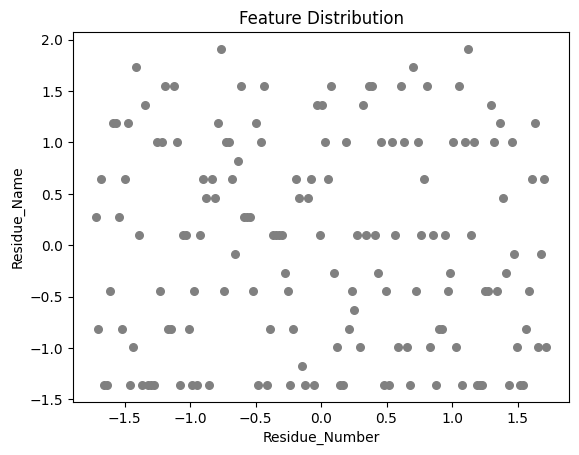

In [7]:
if X_scaled.shape[1] >= 2:
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=(y_true if y_true is not None else 'gray'), cmap='viridis', s=30)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Feature Distribution')
    plt.show()

## K-Means Clustering

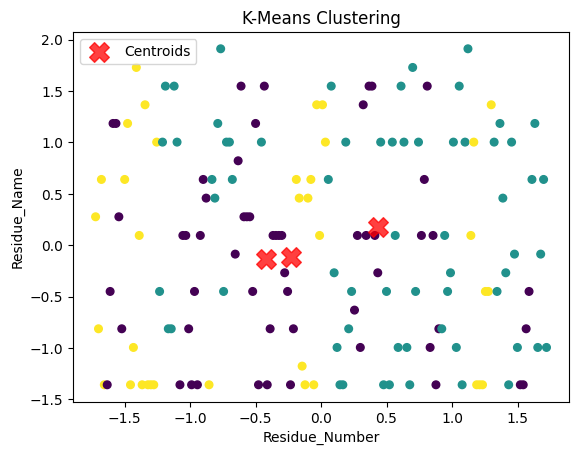

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Gaussian Mixture Model (GMM) Clustering

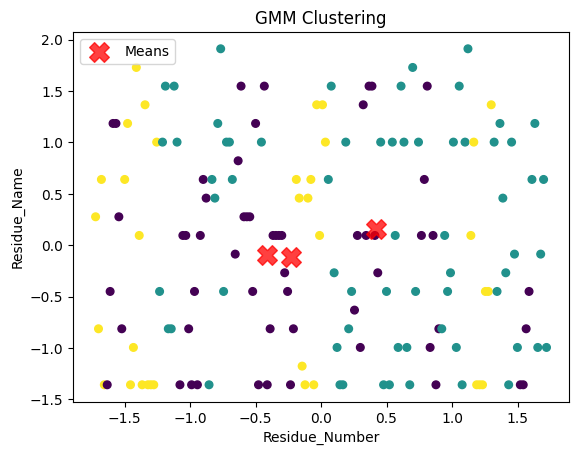

In [9]:
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_gmm, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Means')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('GMM Clustering')
plt.legend()
plt.show()

## Compare Clustering Results with Ground Truth (if available)

In [10]:
if y_true is not None:
    ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
    ari_gmm = adjusted_rand_score(y_true, labels_gmm)
    
    print(f"K-Means Adjusted Rand Index: {ari_kmeans:.4f}")
    print(f"GMM Adjusted Rand Index: {ari_gmm:.4f}")
    
    cm_kmeans = confusion_matrix(y_true, labels_kmeans)
    cm_gmm = confusion_matrix(y_true, labels_gmm)
    
    print("K-Means Confusion Matrix:")
    print(cm_kmeans)
    
    print("GMM Confusion Matrix:")
    print(cm_gmm)

## Feature Importance

Feature Importance based on Cluster Spread:
                                    Feature  KMeans_Spread  GMM_Spread
3                         Hydropathy_Cutoff       0.000000    0.000000
2                                    Window       0.000000    0.000000
4                       Minimum_Blob_Length       0.000000    0.000000
17                            Blob_Disorder       0.000000    0.000000
1                              Residue_Name       0.142183    0.122874
18     Normalized_Kyte-Doolittle_hydropathy       0.305906    0.298479
19                Kyte-Doolittle_hydropathy       0.305906    0.298479
0                            Residue_Number       0.367663    0.354591
5                               blob_length       0.385341    0.392627
11                                Blob_NCPR       0.493294    0.490969
13  Fraction_of_Negatively_Charged_Residues       0.493509    0.477687
7                       Min_Blob_Hydropathy       0.656806    0.656756
12  Fraction_of_Positively_Charge

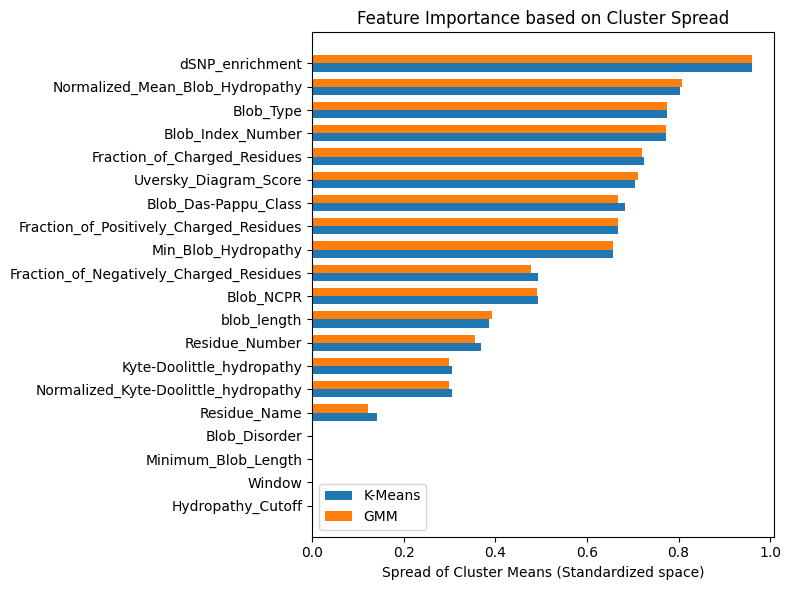

In [11]:
feature_names = df.drop(columns=['TrueCluster'], errors='ignore').columns
kmeans_spread = np.std(kmeans.cluster_centers_, axis=0)
gmm_spread = np.std(gmm.means_, axis=0)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'KMeans_Spread': kmeans_spread,
    'GMM_Spread': gmm_spread
}).sort_values(by='KMeans_Spread', ascending=True)

print("Feature Importance based on Cluster Spread:")
print(importance_df)
# --- IGNORE ---

plt.figure(figsize=(8, 6))
idx = np.arange(len(importance_df))
bar_w = 0.35
plt.barh(idx - bar_w/2, importance_df["KMeans_Spread"], height=bar_w, label="K-Means")
plt.barh(idx + bar_w/2, importance_df["GMM_Spread"], height=bar_w, label="GMM")
plt.yticks(idx, importance_df["Feature"])
plt.xlabel("Spread of Cluster Means (Standardized space)")
plt.title("Feature Importance based on Cluster Spread")
plt.legend()
plt.tight_layout()
plt.show()